In [3]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet")
import dense_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'dense_unet_30ep_512_sG_wo_decay'
INPUT_SHAPE = (512, 512, 1)
RESIZE_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

In [ ]:
num_images_to_select = 50
check_result.visualize_SG_result(model, num_images_to_select, TEST_SOURCE, INPUT_SHAPE, RESIZE_SHAPE, test_preproc)

: 

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}


# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE, 
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    
    is_train=False,
    augmentation= test_preproc
)

model = dense_unet.build_model(input_shape=INPUT_SHAPE)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 48)         480       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 512, 512, 48)         192       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 512, 512, 48)         0         ['batch_normalization[0][0

2024-01-31 02:33:19.013158: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-31 02:33:19.048522: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-31 02:33:19.048735: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

 D)                                                                                               
                                                                                                  
 batch_normalization_2 (Bat  (None, 256, 256, 112)        448       ['max_pooling2d[0][0]']       
 chNormalization)                                                                                 
                                                                                                  
 activation_2 (Activation)   (None, 256, 256, 112)        0         ['batch_normalization_2[0][0]'
                                                                    ]                             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 256, 256, 240)        242160    ['activation_2[0][0]']        
                                                                                                  
 concatena

In [3]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=False)

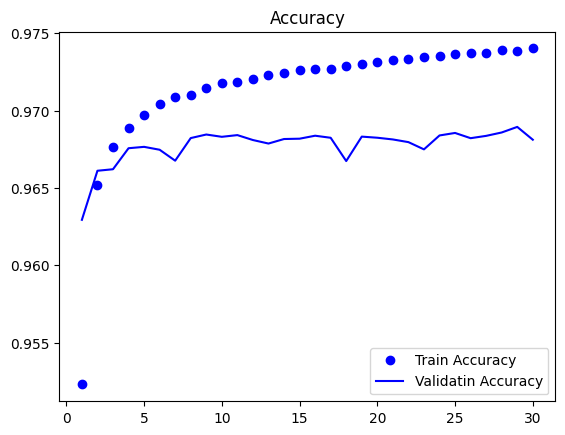

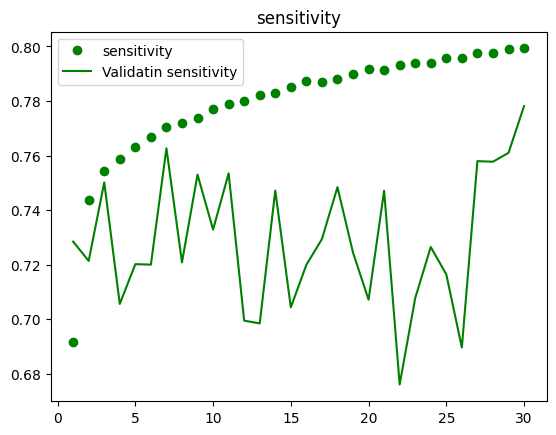

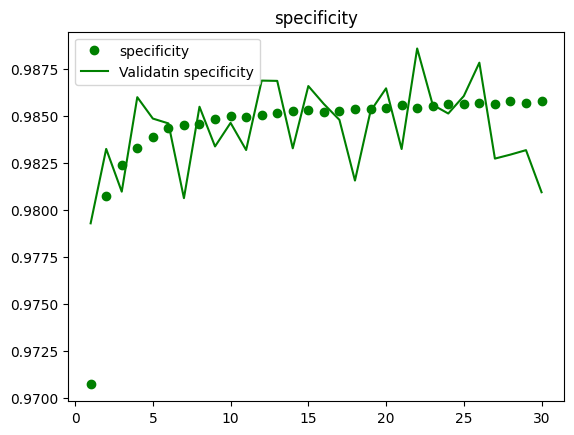

<Figure size 640x480 with 0 Axes>

In [3]:
check_result.plot_history(HISTORY_PATH)

In [3]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

test_preproc = preprocess.build_augmentation_for_general(is_train=False)
test_generator = data_generator.FullSizedDataGenerator(
    TEST_SOURCE, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)
# Load the model with custom_objects parameter
MODEL_PATH = '/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_512_sG_wo_decay.tf/30--0.1685-0.7993-0.9858-0.7781-0.9809.pb'
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

metrics.print_evaluation(model, test_generator)

2024-01-31 02:33:28.909084: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


77/77 [==============================] - 20s 226ms/step - loss: 0.3174 - sensitivity: 0.7738 - specificity: 0.9556 - accuracy: 0.9438
Loss: 0.3174349069595337
Sensitivity: 0.7737941145896912
Specificity: 0.9555888772010803
Accuracy: 0.9438491463661194
